# Loading the data as a time series

In [2]:
import numpy as np
from numpy.array_api import linspace
# import mne
from scipy.io import loadmat
from scipy.signal import decimate, butter, filtfilt
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from eeg_utils import *
%matplotlib inline

/tmp/ipykernel_28951/671407191.py:2: UserWarning: The numpy.array_api submodule is still experimental. See NEP 47.
  from numpy.array_api import linspace


In [3]:
df, left_lfp, right_lfp, left_name, right_name = mat_to_dataframe("sub-0cGdk9_HoldL_MedOff_run1_LFP_Hilbert/sub_i4oK0F_HoldL_MedOff_run1_LFP_Hilbert.mat")

--- Processing file: sub_i4oK0F_HoldL_MedOff_run1_LFP_Hilbert.mat ---
Found data matrix. Key: 'selected_channels_signal', Shape: (2, 1509667)
Found labels. Key: 'target_labels'
Labels extracted: ['LFP-right-23', 'LFP-left-78']


--- DataFrame Created Successfully ---
          LFP-right-23  LFP-left-78
Time (s)                           
0.0000        1.253931    -0.608706
0.0005        0.386463    -0.819621
0.0010       -0.496690    -0.184820
0.0015        0.670664    -0.899828
0.0020        1.982702     1.812119

Successfully extracted left LFP channel: 'LFP-left-78'
Successfully extracted right LFP channel: 'LFP-right-23'


In [4]:
left_name

'LFP-left-78'


Plotting first 5000 samples...


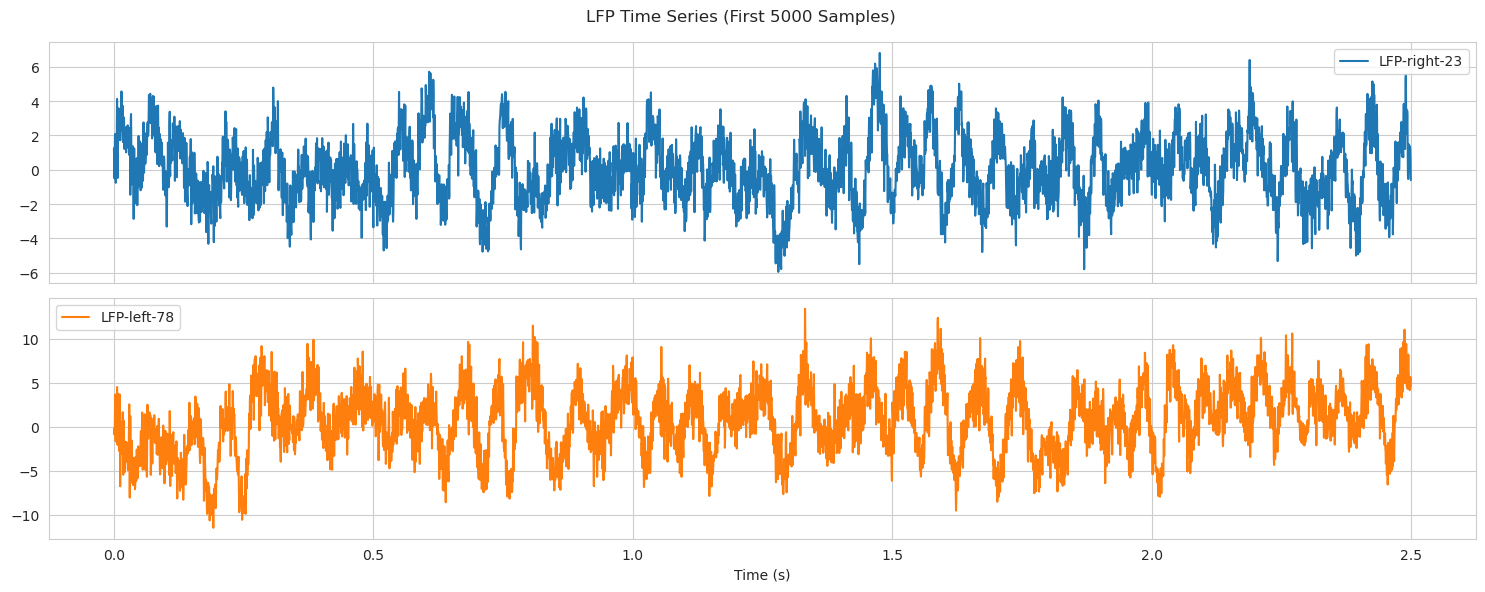

In [5]:
print("\nPlotting first 5000 samples...")
plot_slice = 5000
    
df.iloc[:plot_slice].plot(
        subplots=True,   # Plot each channel separately
        layout=(2, 1),   # Arrange in 2 rows, 1 column
        grid=True,
        title="LFP Time Series (First 5000 Samples)",
        figsize=(15, 6)  # Width, Height in inches
    )
plt.xlabel(df.index.name)
plt.tight_layout()
plt.show()

In [ ]:
# Applying a Band-Pass filter for 4-48 Hz
# Note that this filtering method turns pd.Series into np.array
fs = 2000
lowcut=4
highcut=48
left_filtered = butter_bandpass_filter(data=left_lfp,
                              lowcut=lowcut,
                              highcut=highcut,
                              fs=fs,
                              order=5)

right_filtered = butter_bandpass_filter(data=right_lfp,
                              lowcut=lowcut,
                              highcut=highcut,
                              fs=fs,
                              order=5)

In [ ]:
# Plot the band-pass filtered data
time = np.arange(left_lfp.size) / fs

fig, axes = plt.subplots(nrows=2, ncols= 1, figsize=(15, 6), sharex=True)

axes[0].set_title(f"Band-pass filtered signals  ({lowcut}-{highcut}Hz)")
axes[0].plot(time[:left_lfp.size], right_filtered[:left_lfp.size], label="LFP-rigt-34")
axes[0].set_ylabel("Amplitude")
axes[0].legend()

axes[1].plot(time[:left_lfp.size], left_filtered[:left_lfp.size], label="LFP-left-56", color="orange")

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Downsampling the signal

original_fs = 2000
target_fs = 100 # because of nyquist thm and divisor of fs

if original_fs % target_fs != 0:
    raise ValueError("Original fs must be an integer multiple of Target fs.")

q = original_fs // target_fs

In [ ]:
left = decimate(x=left_filtered, q=q, ftype="fir", zero_phase=True)

# Verify the result
print(f"Original number of left samples: {len(left_filtered)}")
print(f"Downsampled number of left samples: {len(left)}")
print(f"New sampling rate: {target_fs} Hz")

In [ ]:
right = decimate(x=right_filtered, q=q, ftype="fir", zero_phase=True)

# Verify the result
print(f"Original number of samples: {len(right_filtered)}")
print(f"Downsampled number of samples: {len(right)}")
print(f"New sampling rate: {target_fs} Hz")

In [ ]:
plot_duration = 1000 # seconds

time_dwn = np.linspace(0, plot_duration, int(plot_duration * target_fs))

fig, axes = plt.subplots(nrows=2, ncols= 1, figsize=(15, 6), sharex=True)

axes[0].set_title(f"Band-pass filtered signals ({lowcut}-{highcut}Hz) at 100Hz")
axes[0].plot(time_dwn, right[:1000], label="LFP-rigt-34")
axes[0].set_ylabel("Amplitude")
axes[0].grid(True)
axes[0].legend()

axes[1].plot(time_dwn, left[:1000], label="LFP-left-56", color="orange")

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print(len(right[:5000]))
print(len(left[:5000]))

In [ ]:
# Define the sampling rate of your downsampled signal
fs_downsampled = 100 # Hz


right_hold = []
for sec in [314, 416, 522, 617, 707]:
    # Define the start and end times (in seconds) for your desired slice
    start_time_sec = sec
    end_time_sec = start_time_sec + 60
    # Calculate the corresponding start and end indices in the NumPy array
    start_index = int(start_time_sec * fs_downsampled)
    end_index = int(end_time_sec * fs_downsampled)

    # Perform the slicing
    # Ensure the indices are within the bounds of the array
    if start_index < 0:
        start_index = 0
    if end_index > len(left):
        end_index = len(left)

    # Assign the slice to a new variable
    right_hold.append(right[start_index:end_index])

In [ ]:
# Variables created
# right_hold
# left_hold
# right_resting
# left_resting

In [ ]:
# To save the data

import pickle

# Define file paths
left_diagrams_path = "./i4oK0F/medOff_left_hold.pkl"
right_diagrams_path = "./i4oK0F/medOff_right_hold.pkl"

# Save the diagrams
with open(left_diagrams_path, "wb") as f:
    pickle.dump(left_hold, f)
print(f"Saved left_diagrams to {left_diagrams_path}")

with open(right_diagrams_path, "wb") as f:
    pickle.dump(right_hold, f)
print(f"Saved right_diagrams to {right_diagrams_path}")


In [2]:
# To load the data

import pickle
# Define file paths
left_hold_path = "./i4oK0F/medOff_left_hold.pkl"
right_hold_path = "./i4oK0F/medOff_right_hold.pkl"
left_resting_path = "./i4oK0F/medOff_left_resting.pkl"
rigt_resting_path = "./i4oK0F/medOff_right_resting.pkl"
# Load the diagrams
try:
    with open(left_hold_path, "rb") as f:
        left_hold = pickle.load(f)
    print(f"Loaded left_hold from {left_hold_path}")

    with open(right_hold_path, "rb") as f:
        right_hold = pickle.load(f)
    print(f"Loaded right_hold from {right_hold_path}")

    with open(left_resting_path, "rb") as f:
        left_resting = pickle.load(f)
    print(f"Loaded left_resting from {left_resting_path}")

    with open(rigt_resting_path, "rb") as f:
        right_resting = pickle.load(f)
    print(f"Loaded right_resting from {rigt_resting_path}")
except FileNotFoundError:
    print("One or both diagram files not found. Please ensure they have been saved.")

Loaded left_hold from ./i4oK0F/medOff_left_hold.pkl
Loaded right_hold from ./i4oK0F/medOff_right_hold.pkl
Loaded left_resting from ./i4oK0F/medOff_left_resting.pkl
Loaded right_resting from ./i4oK0F/medOff_right_resting.pkl


# Doing the TDA magic

In [3]:
from gtda.time_series import SingleTakensEmbedding
from gtda.time_series import TakensEmbedding
import itertools

# --- Plotting Libraries ---
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
from gtda.plotting import plot_point_cloud, plot_diagram, plot_heatmap
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy, PairwiseDistance, PersistenceLandscape, BettiCurve, HeatKernel, PersistenceImage, Silhouette, Scaler
import seaborn as sns


# --- Set Plotting Themes to Light Mode ---
pio.templates.default = "plotly_white" # For plotly and giotto-tda plots
plt.style.use('default') # For matplotlib plots


In [1]:
import eeg_utils
importlib.reload(eeg_utils)
from eeg_utils import *

NameError: name 'importlib' is not defined

## The current situation of the data
- Band-pass filtered to 4-48 Hz
- Down sampled to 100 Hz (for anti-aliasing, FIR filter is used)
- Resting state data is splitted into 5 non-overlapping windows of 60 second, stored in `left_resting` and `right_resting`
- Hold state data is already in different windows in the series. They are stored in `left_hold` and `right_hold`

In [15]:
max_embedding_dim = 20
max_time_delay = 1000
stride = 1

embedder = SingleTakensEmbedding(
    parameters_type="search",
    time_delay=max_time_delay,
    dimension=max_embedding_dim,
    stride=stride,
    n_jobs=-1
)

In [16]:
left_resting_embeddings = []
right_resting_embeddings = []
left_hold_embeddings = []
right_hold_embeddings = []

for slice in range(len(left_resting)):
    print(f"Slice {slice + 1}:")
    left_resting_embeddings.append(fit_embedder(embedder, left_resting[slice]))

for slice in range(len(left_hold)):
    print(f"Slice {slice + 1}:")
    left_hold_embeddings.append(fit_embedder(embedder, left_resting[slice]))

for slice in range(len(right_resting)):
    print(f"Slice {slice + 1}:")
    right_resting_embeddings.append(fit_embedder(embedder, right_resting[slice]))

for slice in range(len(right_hold)):
    print(f"Slice {slice + 1}:")
    right_hold_embeddings.append(fit_embedder(embedder, right_hold[slice]))


Slice 1:
Shape of embedded time series: (4696, 9)
Optimal embedding dimension is 9 and time delay is 163
Slice 2:
Shape of embedded time series: (5940, 7)
Optimal embedding dimension is 7 and time delay is 10
Slice 3:
Shape of embedded time series: (5776, 8)
Optimal embedding dimension is 8 and time delay is 32
Slice 4:
Shape of embedded time series: (5802, 7)
Optimal embedding dimension is 7 and time delay is 33
Slice 5:
Shape of embedded time series: (5412, 8)
Optimal embedding dimension is 8 and time delay is 84
Slice 1:
Shape of embedded time series: (4696, 9)
Optimal embedding dimension is 9 and time delay is 163
Slice 2:
Shape of embedded time series: (5940, 7)
Optimal embedding dimension is 7 and time delay is 10
Slice 3:
Shape of embedded time series: (5776, 8)
Optimal embedding dimension is 8 and time delay is 32
Slice 4:
Shape of embedded time series: (5802, 7)
Optimal embedding dimension is 7 and time delay is 33
Slice 5:
Shape of embedded time series: (5412, 8)
Optimal embe

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [28]:
left_hold_emb_pca = [pca.fit_transform(pc) for pc in left_hold_embeddings]
left_resting_emb_pca = [pca.fit_transform(pc) for pc in left_resting_embeddings]
right_hold_emb_pca = [pca.fit_transform(pc) for pc in right_hold_embeddings]
right_resting_emb_pca = [pca.fit_transform(pc) for pc in right_resting_embeddings]

In [29]:
print(left_resting_emb_pca[0][:250].shape)

(250, 4)


In [30]:
homology_dims = [0, 1, 2, 3]
persistence = VietorisRipsPersistence(homology_dimensions=homology_dims, n_jobs=-1)

# Create lists to store the diagrams for each slice
left_resting_diagrams = []
right_resting_diagrams = []
left_hold_diagrams = []
right_hold_diagrams = []

cap = 250 # points

# --- Process Left Embeddings ---
print("--- Processing Left Channel Slices ---")
for i, embedding in enumerate(left_resting_embeddings):  # Only first 2 point clouds
    print(f"Calculating persistence for left resting slice {i+1}...")

    embedding_subset = embedding[:cap]  # Take first 250 points from this point cloud
    embedding_3d = embedding_subset[None, :, :]
    diagram = persistence.fit_transform(embedding_3d)
    left_resting_diagrams.append(diagram)

for i, embedding in enumerate(left_hold_embeddings):  # Only first 2 point clouds
    print(f"Calculating persistence for left hold slice {i+1}...")

    embedding_subset = embedding[:cap]  # Take first 250 points from this point cloud
    embedding_3d = embedding_subset[None, :, :]
    diagram = persistence.fit_transform(embedding_3d)
    left_hold_diagrams.append(diagram)

# --- Process Right Embeddings ---
print("\n--- Processing Right Channel Slices ---")
for i, embedding in enumerate(right_resting_embeddings):  # Only first 2 point clouds
    print(f"Calculating persistence for right resting slice {i+1}...")

    embedding_subset = embedding[:cap]  # Take first 250 points from this point cloud
    embedding_3d = embedding_subset[None, :, :]
    diagram = persistence.fit_transform(embedding_3d)
    right_resting_diagrams.append(diagram)

for i, embedding in enumerate(right_hold_embeddings):  # Only first 2 point clouds
    print(f"Calculating persistence for right hold slice {i+1}...")

    embedding_subset = embedding[:cap]  # Take first 250 points from this point cloud
    embedding_3d = embedding_subset[None, :, :]
    diagram = persistence.fit_transform(embedding_3d)
    right_hold_diagrams.append(diagram)

--- Processing Left Channel Slices ---
Calculating persistence for left resting slice 1...
Calculating persistence for left resting slice 2...
Calculating persistence for left resting slice 3...
Calculating persistence for left resting slice 4...
Calculating persistence for left resting slice 5...
Calculating persistence for left hold slice 1...
Calculating persistence for left hold slice 2...
Calculating persistence for left hold slice 3...
Calculating persistence for left hold slice 4...
Calculating persistence for left hold slice 5...

--- Processing Right Channel Slices ---
Calculating persistence for right resting slice 1...
Calculating persistence for right resting slice 2...
Calculating persistence for right resting slice 3...
Calculating persistence for right resting slice 4...
Calculating persistence for right resting slice 5...
Calculating persistence for right hold slice 1...
Calculating persistence for right hold slice 2...
Calculating persistence for right hold slice 3...


In [31]:
plot_diagram(left_hold_diagrams[0][0])

In [ ]:
# Now, left_diagrams and right_diagrams are lists of persistence diagrams.
# You can inspect the first one:
print("Example of a calculated diagram's shape:")
print(left_diagrams[0].shape)

# You can then plot one of them just like before:
print("Plotting the diagram for the first slice of the left channel:")

plot_diagram(left_diagrams[3][0])

In [ ]:
# --- Create Subplot Titles ---
left_titles = [f"Left Slice {i+1}" for i in range(len(left_diagrams))]
right_titles = [f"Right Slice {i+1}" for i in range(len(right_diagrams))]

# --- Create a 4x5 Figure with Subplots ---
fig = make_subplots(
    rows=4,
    cols=5,
    subplot_titles=(left_titles + right_titles)
)

# Define colors for the different homology dimensions
dim_colors = {
    0: 'blue',
    1: 'red',
    2: 'green',
    3: 'purple'
}

# --- Add Traces for Left Channel Diagrams (Rows 1-2) ---
for i, diagram_3d in enumerate(left_diagrams):
    # Correctly calculate row and column for a 5-column grid
    row = (i // 5) + 1
    col = (i % 5) + 1

    diagram_2d = diagram_3d[0]

    for dim in sorted(dim_colors.keys()):
        dim_mask = diagram_2d[:, 2] == dim
        birth = diagram_2d[dim_mask, 0]
        death = diagram_2d[dim_mask, 1]
        finite_mask = np.isfinite(death)

        fig.add_trace(
            go.Scatter(
                x=birth[finite_mask],
                y=death[finite_mask],
                mode='markers',
                marker_color=dim_colors.get(dim),
                name=f'H{dim}',
                legendgroup=f'H{dim}',
                showlegend=(i == 0)  # Show legend only on the very first plot
            ),
            row=row,
            col=col
        )

    max_val = np.max(diagram_2d[np.isfinite(diagram_2d[:, 1])]) if np.any(np.isfinite(diagram_2d[:, 1])) else 1
    fig.add_shape(
        type="line", x0=0, y0=0, x1=max_val, y1=max_val,
        line=dict(color="black", width=1, dash="dash"),
        row=row, col=col
    )

# --- Add Traces for Right Channel Diagrams (Rows 3-4) ---
for i, diagram_3d in enumerate(right_diagrams):
    # Calculate row and column, starting from row 3
    row = (i // 5) + 3
    col = (i % 5) + 1

    diagram_2d = diagram_3d[0]

    for dim in sorted(dim_colors.keys()):
        dim_mask = diagram_2d[:, 2] == dim
        birth = diagram_2d[dim_mask, 0]
        death = diagram_2d[dim_mask, 1]
        finite_mask = np.isfinite(death)

        fig.add_trace(
            go.Scatter(
                x=birth[finite_mask],
                y=death[finite_mask],
                mode='markers',
                marker_color=dim_colors.get(dim),
                name=f'H{dim}',
                legendgroup=f'H{dim}',
                showlegend=False  # Hide legends for all other plots
            ),
            row=row,
            col=col
        )

    max_val = np.max(diagram_2d[np.isfinite(diagram_2d[:, 1])]) if np.any(np.isfinite(diagram_2d[:, 1])) else 1
    fig.add_shape(
        type="line", x0=0, y0=0, x1=max_val, y1=max_val,
        line=dict(color="black", width=1, dash="dash"),
        row=row, col=col
    )

# --- Update Layout and Axis Titles ---
fig.update_layout(
    height=1200,  # Increased height for 4 rows
    width=1600,
    title_text="Persistence Diagrams for All Slices",
    title_x=0.5,
    legend_title_text='Homology Dimension',
    plot_bgcolor='white'
)

fig.update_xaxes(title_text="Birth", showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(title_text="Death", showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()

# Save and Load Persistence Diagrams

In [33]:
import pickle

# Define file paths
left_resting_path = "./i4oK0F/medOff_left_resting_diagrams.pkl"
right_resting_path = "./i4oK0F/medOff_right_resting_diagrams.pkl"
left_hold_path = "./i4oK0F/medOff_left_hold_diagrams.pkl"
right_hold_path = "./i4oK0F/medOff_right_hold_diagrams.pkl"

# Save the diagrams
with open(left_resting_path, "wb") as f:
    pickle.dump(left_resting_diagrams, f)
print(f"Saved left_diagrams to {left_resting_path}")

with open(right_resting_path, "wb") as f:
    pickle.dump(right_resting_diagrams, f)
print(f"Saved right_diagrams to {right_resting_path}")

with open(left_hold_path, "wb") as f:
    pickle.dump(left_hold_diagrams, f)
print(f"Saved left_hold_diagrams to {left_hold_path}")

with open(right_hold_path, "wb") as f:
    pickle.dump(right_hold_diagrams, f)
print(f"Saved right_hold_diagrams to {right_hold_path}")

Saved left_diagrams to ./i4oK0F/medOff_left_resting_diagrams.pkl
Saved right_diagrams to ./i4oK0F/medOff_right_resting_diagrams.pkl
Saved left_hold_diagrams to ./i4oK0F/medOff_left_hold_diagrams.pkl
Saved right_hold_diagrams to ./i4oK0F/medOff_right_hold_diagrams.pkl


# Load Persistence Diagrams (run this cell if you want to load saved data)

In [34]:
import pickle

# Define file paths
left_resting_path = "./i4oK0F/medOff_left_resting_diagrams.pkl"
right_resting_path = "./i4oK0F/medOff_right_resting_diagrams.pkl"
left_hold_path = "./i4oK0F/medOff_left_hold_diagrams.pkl"
right_hold_path = "./i4oK0F/medOff_right_hold_diagrams.pkl"

# Load the diagrams
try:
    with open(left_resting_path, "rb") as f:
        left_resting_diagrams = pickle.load(f)
    print(f"Loaded left_diagrams from {left_resting_path}")

    with open(right_resting_path, "rb") as f:
        right_resting_diagrams = pickle.load(f)
    print(f"Loaded right_diagrams from {right_resting_path}")

    with open(left_hold_path, "rb") as f:
        left_hold_diagrams = pickle.load(f)
    print(f"Loaded left_diagrams from {left_hold_path}")

    with open(right_hold_path, "rb") as f:
        right_hold_diagrams = pickle.load(f)
    print(f"Loaded right_diagrams from {right_hold_path}")
except FileNotFoundError:
    print("One or both diagram files not found. Please ensure they have been saved.")


Loaded left_diagrams from ./i4oK0F/medOff_left_resting_diagrams.pkl
Loaded right_diagrams from ./i4oK0F/medOff_right_resting_diagrams.pkl
Loaded left_diagrams from ./i4oK0F/medOff_left_hold_diagrams.pkl
Loaded right_diagrams from ./i4oK0F/medOff_right_hold_diagrams.pkl


# Feature Extraction

## Persistence Entropy

In [39]:
PE = PersistenceEntropy()
left_resting_pe = [PE.fit_transform(slice) for slice in left_resting_diagrams]
for feat in range(len(left_resting_pe)):
    print(f"Left Resting State: Slice {feat + 1}: {left_resting_pe[feat]}")

PE = PersistenceEntropy()
right_resting_pe = [PE.fit_transform(slice) for slice in right_resting_diagrams]
for feat in range(len(right_resting_pe)):
    print(f"Right Resting State: Slice {feat + 1}: {right_resting_pe[feat]}")
PE = PersistenceEntropy()
left_hold_pe = [PE.fit_transform(slice) for slice in left_hold_diagrams]
for feat in range(len(left_hold_pe)):
    print(f"Left Hold State: Slice {feat + 1}: {left_hold_pe[feat]}")
PE = PersistenceEntropy()
right_hold_pe = [PE.fit_transform(slice) for slice in right_hold_diagrams]
for feat in range(len(right_hold_pe)):
    print(f"Right Hold State: Slice {feat + 1}: {right_hold_pe[feat]}")

Left Resting State: Slice 1: [[7.93536324 7.61500588 6.74887105 5.56732115]]
Left Resting State: Slice 2: [[7.93906758 7.59077766 7.04246726 5.755315  ]]
Left Resting State: Slice 3: [[7.92683351 7.26201592 6.2805402  4.80713132]]
Left Resting State: Slice 4: [[7.92368204 7.36253857 6.38813704 4.83180072]]
Left Resting State: Slice 5: [[7.93101286 7.29980934 6.38691494 4.83310664]]
Right Resting State: Slice 1: [[7.93096579 7.35479897 6.47536879 4.71283314]]
Right Resting State: Slice 2: [[7.93450069 7.50397872 6.67313156 5.63270416]]
Right Resting State: Slice 3: [[7.9224206  7.22168127 6.18609335 2.57016345]]
Right Resting State: Slice 4: [[7.90990815 7.26993204 6.06631356 4.68900509]]
Right Resting State: Slice 5: [[7.91746036 7.23645115 6.17635561 4.46033058]]
Left Hold State: Slice 1: [[7.93536324 7.61500588 6.74887105 5.56732115]]
Left Hold State: Slice 2: [[7.93906758 7.59077766 7.04246726 5.755315  ]]
Left Hold State: Slice 3: [[7.92683351 7.26201592 6.2805402  4.80713132]]
Lef

## Other Small Features

In [41]:
left_resting_sm_features = [extract_features(slice, homology_dimensions=homology_dims, verbose=False) for slice in left_resting_diagrams]

right_resting_sm_features = [extract_features(slice, homology_dimensions=homology_dims, verbose=False) for slice in right_resting_diagrams]

left_hold_sm_features = [extract_features(slice, homology_dimensions=homology_dims, verbose=False) for slice in left_hold_diagrams]

right_hold_sm_features = [extract_features(slice, homology_dimensions=homology_dims, verbose=False) for slice in right_hold_diagrams]

## Persistence Landscapes

In [45]:
PL = PersistenceLandscape()

left_resting_pl = [PL.fit_transform(slice) for slice in left_resting_diagrams]
left_hold_pl = [PL.fit_transform(slice) for slice in left_hold_diagrams]
right_resting_pl = [PL.fit_transform(slice) for slice in right_resting_diagrams]
right_hold_pl = [PL.fit_transform(slice) for slice in right_hold_diagrams]

print(f"Shape of the PL of each slice: {left_resting_pl[0].shape}")

Shape of the PL of each slice: (1, 4, 100)


In [49]:
PL.plot(left_resting_pl[4])

## Betti Curves

In [50]:
BC = BettiCurve()

left_resting_bc = [BC.fit_transform(slice) for slice in left_resting_diagrams]
right_resting_bc = [BC.fit_transform(slice) for slice in right_resting_diagrams]
left_hold_bc = [BC.fit_transform(slice) for slice in left_hold_diagrams]
right_hold_bc = [BC.fit_transform(slice) for slice in right_hold_diagrams]

In [51]:
BC.plot(right_hold_bc[2])

## Heat Kernel

In [52]:
HK = HeatKernel()

left_resting_hk = [HK.fit_transform(slice) for slice in left_resting_diagrams]
right_resting_hk = [HK.fit_transform(slice) for slice in right_resting_diagrams]
left_hold_hk = [HK.fit_transform(slice) for slice in left_hold_diagrams]
right_hold_hk = [HK.fit_transform(slice) for slice in right_hold_diagrams]

In [53]:
HK.plot(left_resting_hk[2])

In [54]:
HK.plot(left_resting_hk[2], homology_dimension_idx=2)

## Calculating Pairwise Distance
Here's an example of how to use `PairwiseDistance` to calculate the distance between two of your persistence diagrams.

## First pad the diagrams into suitable dimensions

In [ ]:
# Extract all 10 diagrams (squeeze out the singleton dimension)
left_all_diagrams = [left_diagrams[i][0] for i in range(len(left_diagrams))]

# Pad them correctly
left_diagrams_padded = pad_diagrams(left_all_diagrams)

print(f"Number of diagrams: {len(left_all_diagrams)}")
print(f"Padded array shape: {left_diagrams_padded.shape}")

In [ ]:
# Extract all 10 diagrams (squeeze out the singleton dimension)
right_all_diagrams = [right_diagrams[i][0] for i in range(len(right_diagrams))]

# Pad them correctly
right_diagrams_padded = pad_diagrams(right_all_diagrams)

print(f"Number of diagrams: {len(right_all_diagrams)}")
print(f"Padded array shape: {right_diagrams_padded.shape}")

## Now scale the diagrams with respect to a metric

In [ ]:
scaler = Scaler(metric='wasserstein')  # or try 'landscape', 'silhouette'
left_diagrams_scaled = scaler.fit_transform(left_diagrams_padded)

In [ ]:
scaler = Scaler(metric='wasserstein')  # or try 'landscape', 'silhouette'
right_diagrams_scaled = scaler.fit_transform(right_diagrams_padded)

## Wasserstein Distance

In [ ]:
# Compute all pairwise distances
pwise_dist = PairwiseDistance(metric="wasserstein")
left_dist_mx = pwise_dist.fit_transform(left_diagrams_scaled)

print(f"Distance matrix shape: {left_dist_mx.shape}")
print(f"Distance matrix:\n{left_dist_mx}")

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(left_dist_mx, annot=True, fmt='.2f', cmap='viridis')
plt.title('Pairwise Wasserstein Distances of left diagrams with Wasserstein Scaling')
plt.xlabel('Diagram Index')
plt.ylabel('Diagram Index')
plt.show()

In [ ]:
# Compute all pairwise distances
pwise_dist = PairwiseDistance(metric="wasserstein")
right_dist_mx = pwise_dist.fit_transform(right_diagrams_scaled)

print(f"Distance matrix shape: {right_dist_mx.shape}")
print(f"Distance matrix:\n{right_dist_mx}")

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(right_dist_mx, annot=True, fmt='.2f', cmap='viridis')
plt.title('Pairwise Wasserstein Distances with Wasserstein Scaling')
plt.xlabel('Diagram Index')
plt.ylabel('Diagram Index')
plt.show()

In [ ]:
# Define file paths
left_diagrams_path = "./Saved_Data/medOff_left_wasserstein.pkl"
right_diagrams_path = "./Saved_Data/medOff_right_wasserstein.pkl"

# Save the diagrams
with open(left_diagrams_path, "wb") as f:
    pickle.dump(left_dist_mx, f)
print(f"Saved left_diagrams to {left_diagrams_path}")

with open(right_diagrams_path, "wb") as f:
    pickle.dump(right_dist_mx, f)
print(f"Saved right_diagrams to {right_diagrams_path}")

## Bottleneck Distance

In [ ]:
# Compute all pairwise distances
pwise_dist = PairwiseDistance(metric="bottleneck")
left_dist_mx = pwise_dist.fit_transform(left_diagrams_scaled)

print(f"Distance matrix shape: {left_dist_mx.shape}")
print(f"Distance matrix:\n{left_dist_mx}")

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(left_dist_mx, annot=True, fmt='.2f', cmap='viridis')
plt.title('Pairwise Bottleneck Distances of left diagrams with Wasserstein Scaling')
plt.xlabel('Diagram Index')
plt.ylabel('Diagram Index')
plt.show()

In [ ]:
# Compute all pairwise distances
pwise_dist = PairwiseDistance(metric="bottleneck")
right_dist_mx = pwise_dist.fit_transform(right_diagrams_scaled)

print(f"Distance matrix shape: {right_dist_mx.shape}")
print(f"Distance matrix:\n{right_dist_mx}")

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(right_dist_mx, annot=True, fmt='.2f', cmap='viridis')
plt.title('Pairwise Bottleneck Distances of right diagrams with Wasserstein Scaling')
plt.xlabel('Diagram Index')
plt.ylabel('Diagram Index')
plt.show()

In [ ]:
# Define file paths
left_diagrams_path = "./Saved_Data/medOff_left_bottleneck.pkl"
right_diagrams_path = "./Saved_Data/medOff_right_bottleneck.pkl"

# Save the diagrams
with open(left_diagrams_path, "wb") as f:
    pickle.dump(left_dist_mx, f)
print(f"Saved left_diagrams to {left_diagrams_path}")

with open(right_diagrams_path, "wb") as f:
    pickle.dump(right_dist_mx, f)
print(f"Saved right_diagrams to {right_diagrams_path}")